<a href="https://colab.research.google.com/github/hardikroutray/ECG/blob/main/CNN_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries or install unavailable libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']
from imutils import paths
import time   # time1 = time.time(); print('Time taken: {:.1f} sec'.format(time.time() - time1))
import cv2
import pickle
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from sklearn.metrics import plot_confusion_matrix

In [3]:
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('/content/MyDrive', force_remount=True)
!ls /content/MyDrive/MyDrive/ECG/data_v2/

unset HISTFILE; export PS1="root@bfdda03e1cab-a3f30825b6314fdbbc205ba5c2b4e25b: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@bfdda03e1cab-a3f30825b6314fdbbc205ba5c2b4e25b: umount -f /content/MyDrive || umount /content/MyDrive; pkill -9 -x drive
umount: /content/MyDrive: no mount point specified.
umount: /content/MyDrive: no mount point specified.
root@bfdda03e1cab-a3f30825b6314fdbbc205ba5c2b4e25b: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@bfdda03e1cab-a3f30825b6314fdbbc205ba5c2b4e25b: ( while `sleep 0.5`; do if [[ -d "/content/MyDrive" && "$(ls -A /content/MyDrive)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 115
root@bfdda03e1cab-a3f30825b6314fdbbc205ba5c2b4e25b: cat /tmp/tmp5gqm944m/drive.fifo | head -1 | ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task

<class 'PIL.Image.Image'>
None
L
(150, 150)


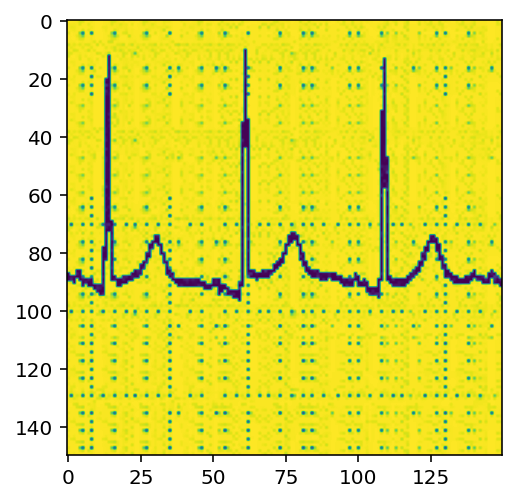

In [4]:
img = image.load_img('/content/MyDrive/MyDrive/ECG/data_v2/NormalPersonECGImages/Cropped_Images/Normal_100Cropped_lead4.png', grayscale=True, target_size=(150,150)) #target_size=(28,28), grayscale=True

print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
plt.imshow(img)

In [5]:
img_array = image.img_to_array(img)
print(img_array.dtype)
print(img_array.shape)
img_back = image.array_to_img(img_array)
# plt.imshow(img_back)

float32
(150, 150, 1)


In [6]:
#Make a dataframe with first column as the path to images and the second column as the labels
import os

images = []
labels = []

dirs = ['ECGImagesofMyocardialInfarctionPatients', 'ECGImagesofPatientthathaveabnormalheartbeat', 'ECGImagesofPatientthathaveHistoryofMI', 'NormalPersonECGImages']

for dir in dirs:
  print(dir)
  for filename in os.listdir('/content/MyDrive/MyDrive/ECG/data_v2/{}/Cropped_Images/'.format(dir)):
    if filename.endswith("png") and "lead4" in filename: 
      # print(dir,filename)
      images.append('/content/MyDrive/MyDrive/ECG/data_v2/{}/Cropped_Images/{}'.format(dir,filename))
      # if dir == 'ECGImagesofCOVID-19Patients':
      #   labels.append(1)
      if dir == 'ECGImagesofMyocardialInfarctionPatients':
        labels.append(1)
      elif dir == 'ECGImagesofPatientthathaveabnormalheartbeat':
        labels.append(2)
      elif dir == 'ECGImagesofPatientthathaveHistoryofMI':
        labels.append(3)
      elif dir == 'NormalPersonECGImages':
        labels.append(0)

df = pd.DataFrame({"image":images, "label":labels})
df
df.to_csv("ECG_cropped_lead4.csv", index=False)
!cp "ECG_cropped_lead4.csv" "/content/MyDrive/MyDrive/ECG/"

ECGImagesofMyocardialInfarctionPatients
ECGImagesofPatientthathaveabnormalheartbeat
ECGImagesofPatientthathaveHistoryofMI
NormalPersonECGImages


In [7]:
df["image"][300]

'/content/MyDrive/MyDrive/ECG/data_v2/ECGImagesofPatientthathaveabnormalheartbeat/Cropped_Images/HB_72Cropped_lead4.png'

# **Convert all images into np arrays and divide into training and test dataset, build the model and train your network**

In [8]:
imagedata = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img('{}'.format(df["image"][i]), target_size=(150,150,1), grayscale=True) #, grayscale=True
    img = image.img_to_array(img)
    img = img/255
    imagedata.append(img)
X = np.array(imagedata)

100%|██████████| 928/928 [04:52<00:00,  3.18it/s]


In [9]:
y=df['label'].values
y = to_categorical(y) #one-hot encoding

In [10]:
np.save('X_data_v2_croppedimages_lead4_150150.npy', X)
!cp "X_data_v2_croppedimages_lead4_150150.npy" "/content/MyDrive/MyDrive/ECG/"

np.save('y_data_v2_croppedimages_lead4_150150.npy', y)
!cp "y_data_v2_croppedimages_lead4_150150.npy" "/content/MyDrive/MyDrive/ECG/"

In [11]:
X_load = np.load('/content/MyDrive/MyDrive/ECG/X_data_v2_croppedimages_lead4_150150.npy')
y_load = np.load('/content/MyDrive/MyDrive/ECG/y_data_v2_croppedimages_lead4_150150.npy')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_load, y_load, random_state=100, test_size=0.2, shuffle=True, stratify=y_load)

In [13]:
# model = Sequential()
# model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4, activation='softmax'))


model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',input_shape=(150,150,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 128)     1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      73792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 152352)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                9

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [16]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
24/24 [==============================] - 161s 7s/step - loss: 1.9199 - accuracy: 0.2938 - val_loss: 1.3810 - val_accuracy: 0.3065
Epoch 2/20
24/24 [==============================] - 159s 7s/step - loss: 1.3937 - accuracy: 0.2858 - val_loss: 1.3717 - val_accuracy: 0.3065
Epoch 3/20
24/24 [==============================] - 159s 7s/step - loss: 1.3797 - accuracy: 0.3070 - val_loss: 1.3786 - val_accuracy: 0.3065
Epoch 4/20
24/24 [==============================] - 159s 7s/step - loss: 1.3810 - accuracy: 0.2855 - val_loss: 1.3724 - val_accuracy: 0.3065
Epoch 5/20
24/24 [==============================] - 159s 7s/step - loss: 1.3736 - accuracy: 0.3034 - val_loss: 1.3705 - val_accuracy: 0.3065
Epoch 6/20
24/24 [==============================] - 159s 7s/step - loss: 1.3746 - accuracy: 0.3183 - val_loss: 1.3701 - val_accuracy: 0.3065
Epoch 7/20
24/24 [==============================] - 159s 7s/step - loss: 1.3711 - accuracy: 0.2911 - val_loss: 1.2889 - val_accuracy: 0.4355
Epoch 8/20
24

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8630236387252808
Test accuracy: 0.8870967626571655


In [18]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


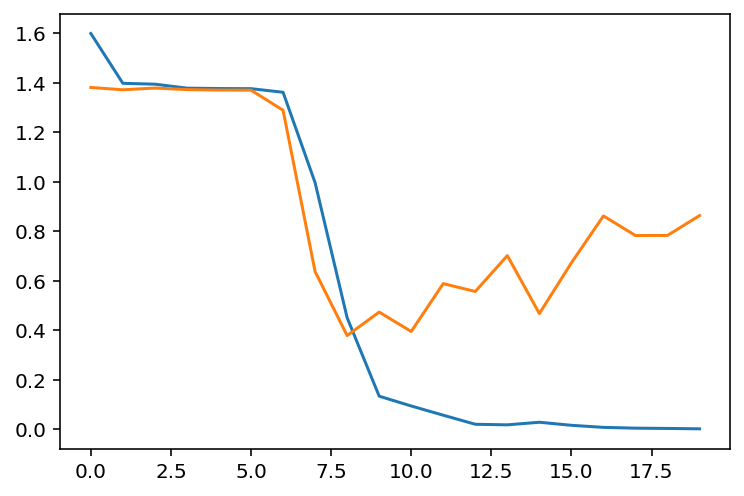

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

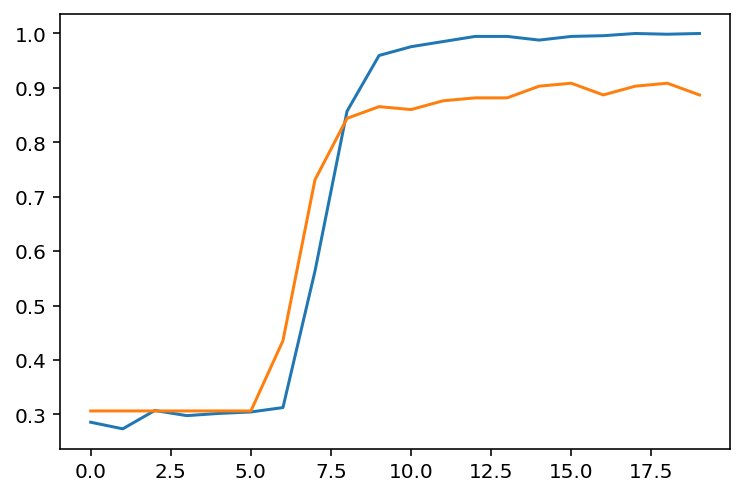

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.legend()

In [21]:
import sklearn.metrics as metrics

y_test_pred = model.predict(X_test)  
y_test_pred_labels = np.argmax(y_test_pred, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
# print(y_test_pred_labels)
y_test_labels = np.argmax(y_test, axis=1)
# print(y_test_labels)
confusion_matrix = metrics.confusion_matrix(y_true=y_test_labels, y_pred=y_test_pred_labels)  

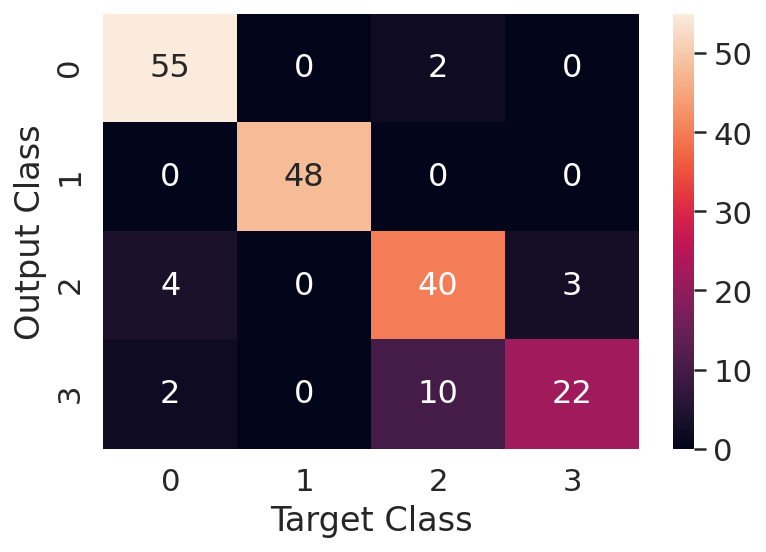

In [22]:
df_cm = pd.DataFrame(confusion_matrix, range(4), range(4))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size

plt.xlabel("Target Class")
plt.ylabel("Output Class")

plt.show()

In [23]:
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d (3, 3, 1, 128)
conv2d_1 (3, 3, 128, 64)
conv2d_2 (3, 3, 64, 32)
conv2d_3 (3, 3, 32, 32)


-0.18627523 0.1932405 (3, 3, 128, 64)


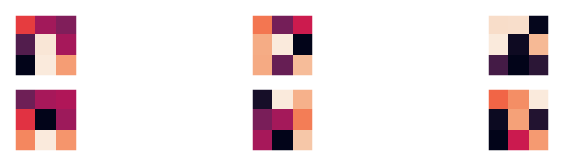

In [24]:
filters, biases = model.layers[1].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

print(f_min, f_max, filters.shape)

# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j]) #, cmap='gray'
		ix += 1
# show the figure
plt.savefig("filter_layer1.png", dpi=300)
!cp "filter_layer1.png" "/content/MyDrive/MyDrive/ECG/"
pyplot.show()


conv2d (3, 3, 1, 128)
128


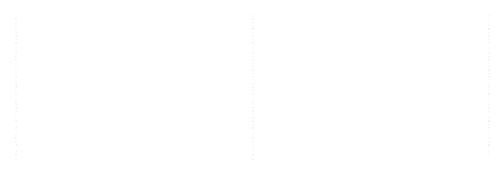

conv2d_1 (3, 3, 128, 64)
64


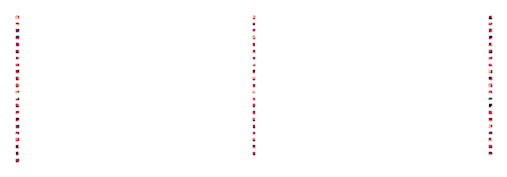

conv2d_2 (3, 3, 64, 32)
32


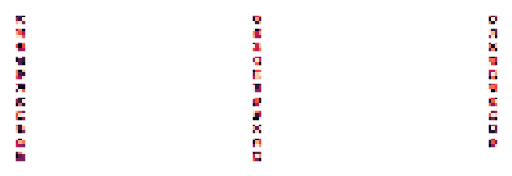

conv2d_3 (3, 3, 32, 32)
32


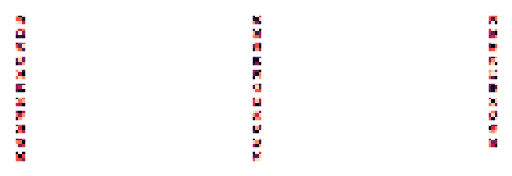

In [25]:
#Iterate thru all the layers of the model
layer_num=0
for layer in model.layers:
    layer_num+=1
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, weights.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        

        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(1):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        # plt.savefig("filter_layer{}.png".format(layer_num), dpi=300)

        plt.show()
        
# !cp "filter_layer1.png" "/content/MyDrive/MyDrive/ECG/" 
# !cp "filter_layer2.png" "/content/MyDrive/MyDrive/ECG/" 
# !cp "filter_layer3.png" "/content/MyDrive/MyDrive/ECG/" 

(1, 150, 150, 1)
(1, 146, 146, 64)
(1, 73, 73, 64)
(1, 71, 71, 32)
(1, 69, 69, 32)
(1, 152352)
(1, 64)
(1, 128)
(1, 128)
(1, 4)


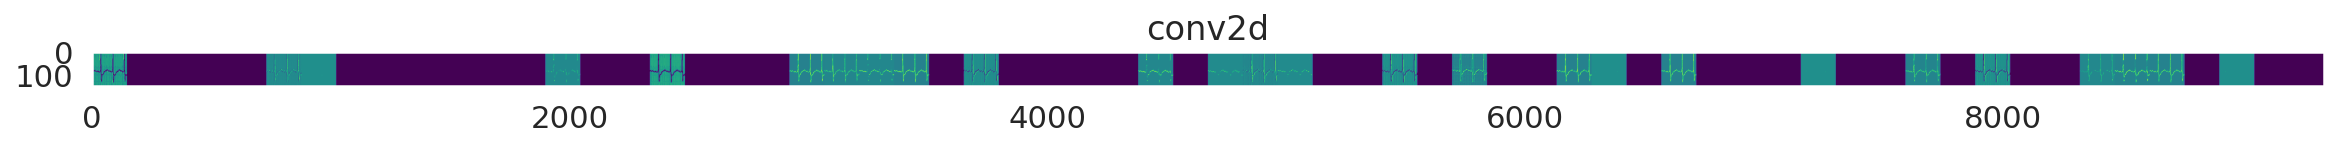

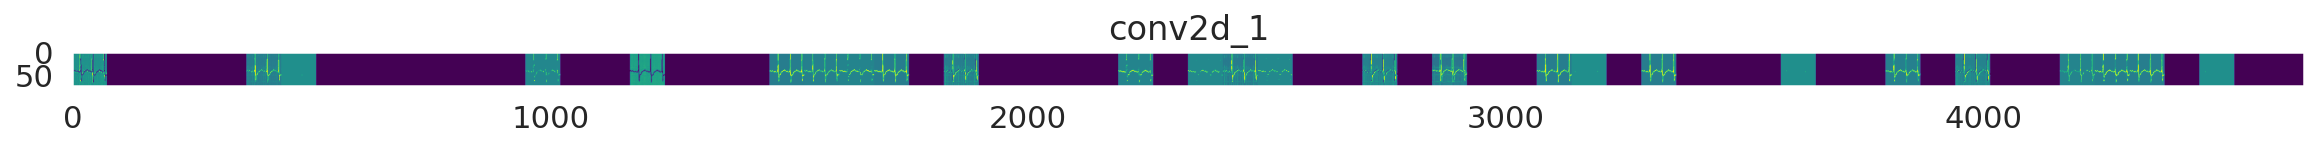

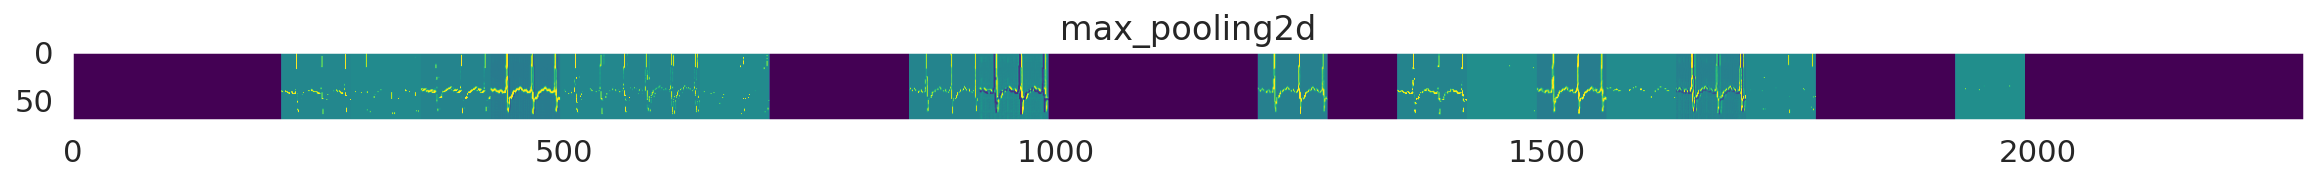

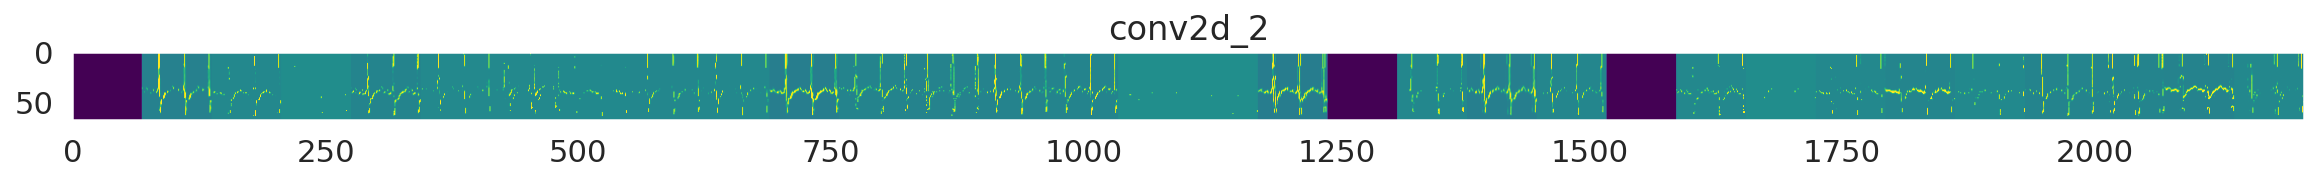

In [27]:
img_path='/content/MyDrive/MyDrive/ECG/data_v2/ECGImagesofMyocardialInfarctionPatients/Cropped_Images/MI_1Cropped_lead4.png' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(150, 150), grayscale=True)
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)

print(x.shape)
# '''
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )
# '''

(1, 150, 150, 1)
(1, 146, 146, 64)
(1, 73, 73, 64)
(1, 71, 71, 32)
(1, 69, 69, 32)
(1, 152352)
(1, 64)
(1, 128)
(1, 128)
(1, 4)


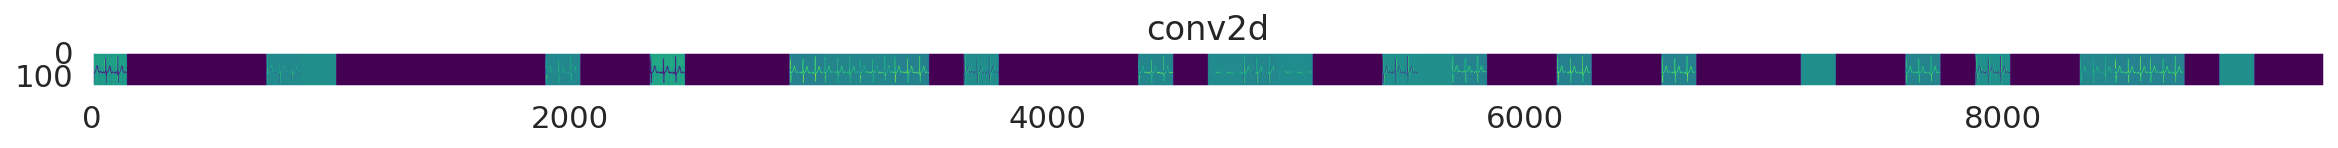

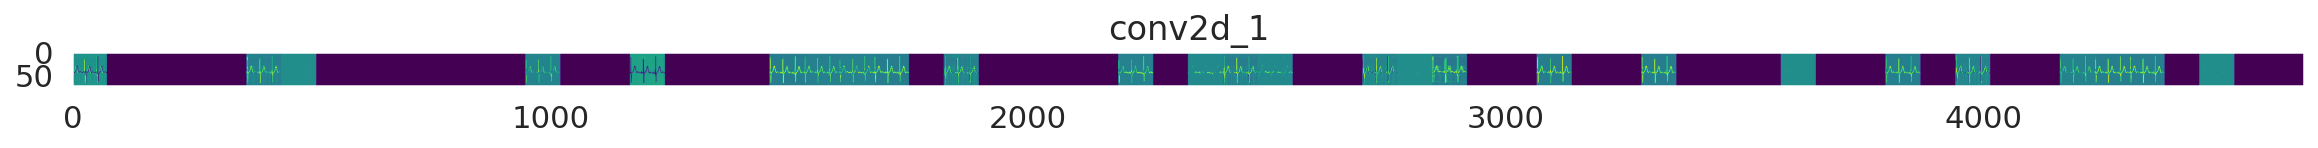

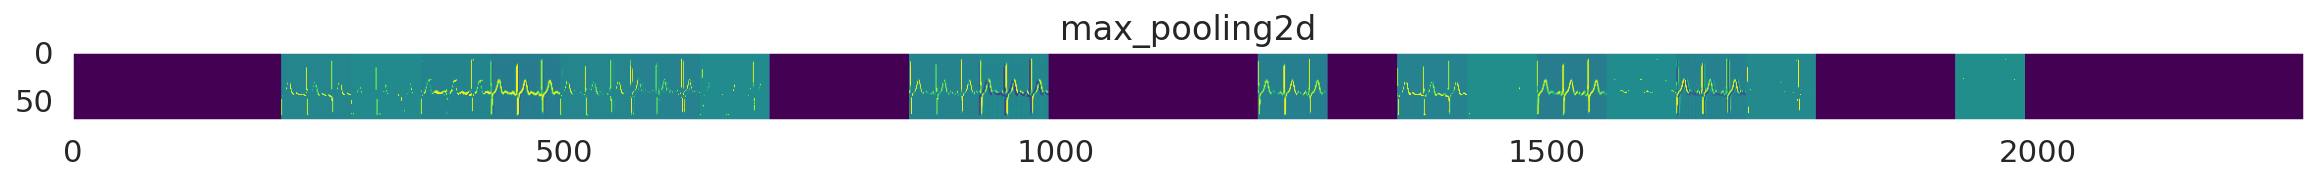

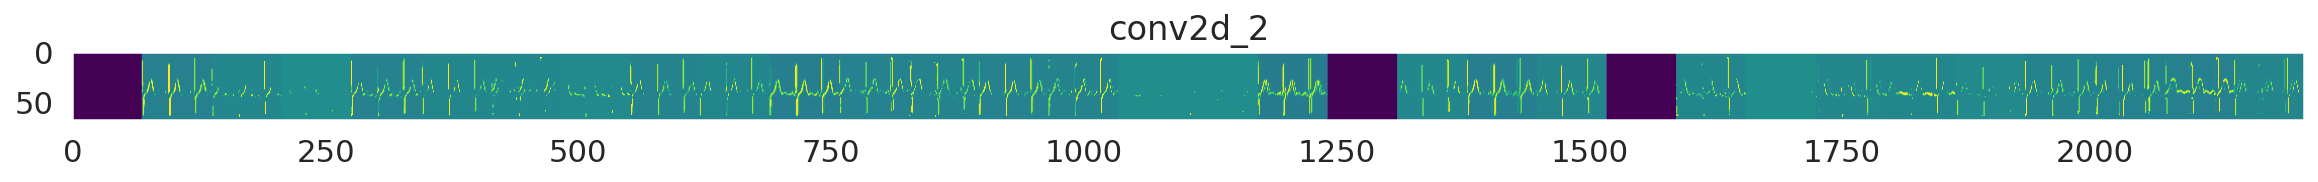

In [29]:
img_path='/content/MyDrive/MyDrive/ECG/data_v2/NormalPersonECGImages/Cropped_Images/Normal_1Cropped_lead4.png' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(150, 150), grayscale=True)
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)

print(x.shape)
# '''
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )
# '''

(1, 150, 150, 1)
(1, 146, 146, 64)
(1, 73, 73, 64)
(1, 71, 71, 32)
(1, 69, 69, 32)
(1, 152352)
(1, 64)
(1, 128)
(1, 128)
(1, 4)


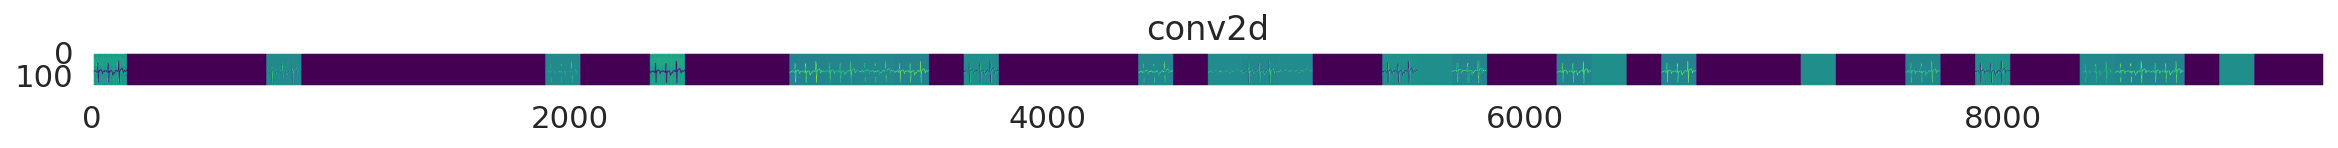

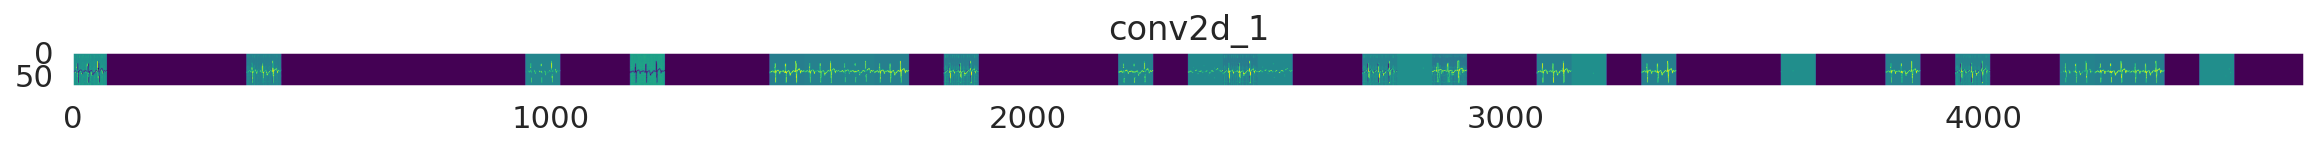

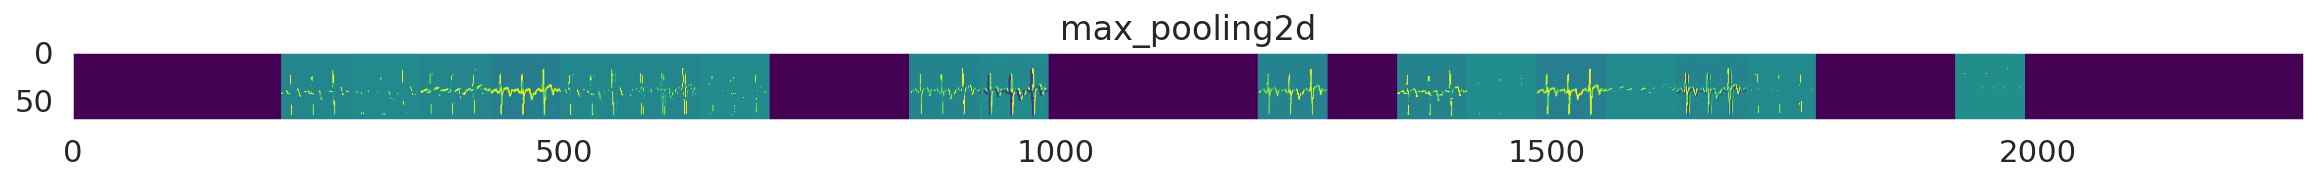

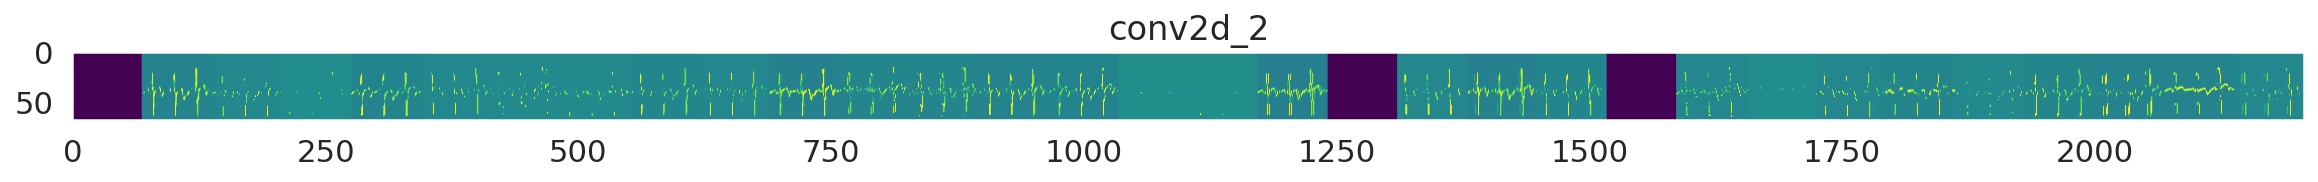

In [30]:
img_path='/content/MyDrive/MyDrive/ECG/data_v2/ECGImagesofPatientthathaveabnormalheartbeat/Cropped_Images/HB_1Cropped_lead4.png' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(150, 150), grayscale=True)
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)

print(x.shape)
# '''
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )
# '''

(1, 150, 150, 1)
(1, 146, 146, 64)
(1, 73, 73, 64)
(1, 71, 71, 32)
(1, 69, 69, 32)
(1, 152352)
(1, 64)
(1, 128)
(1, 128)
(1, 4)


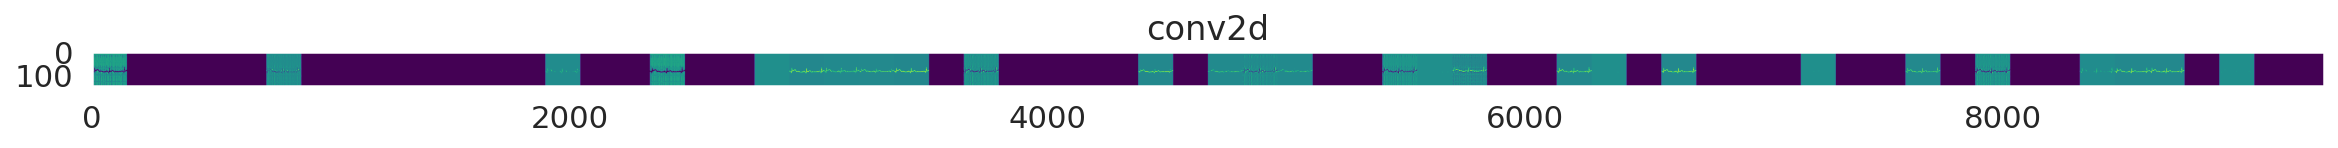

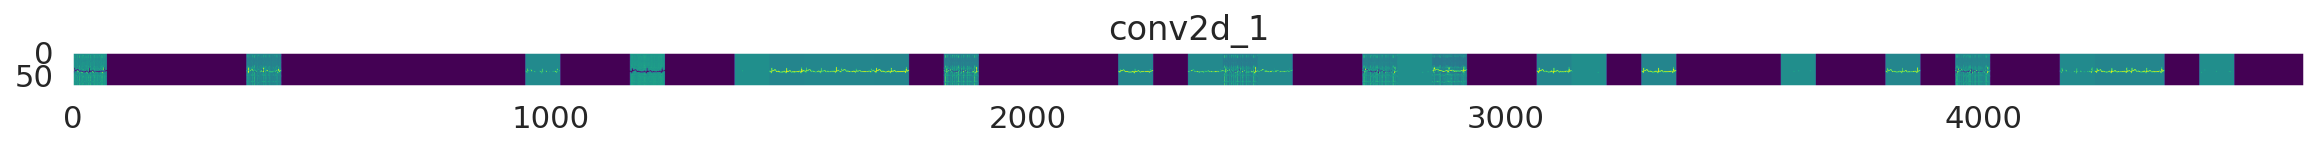

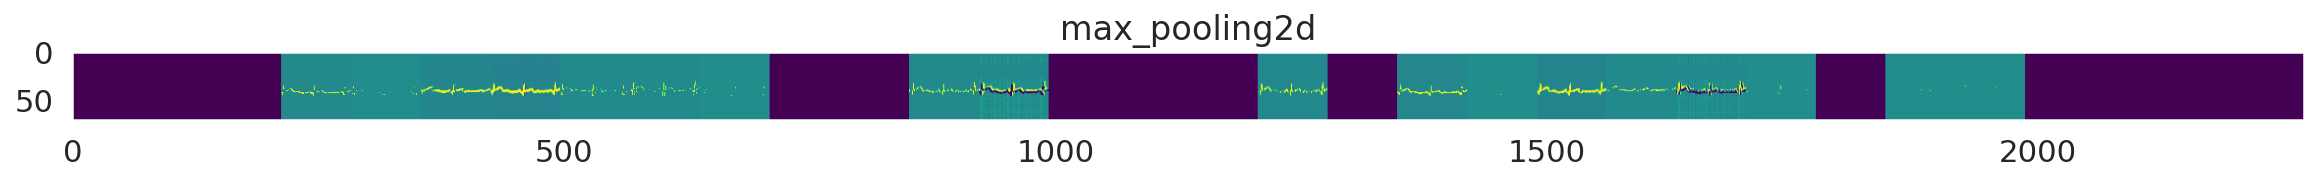

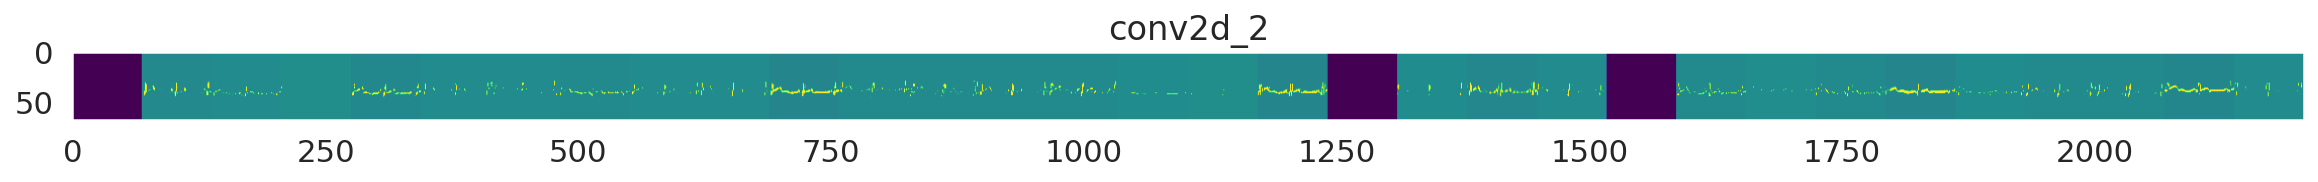

In [31]:
img_path='/content/MyDrive/MyDrive/ECG/data_v2/ECGImagesofPatientthathaveHistoryofMI/Cropped_Images/PMI_129Cropped_lead4.png' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(150, 150), grayscale=True)
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)

print(x.shape)
# '''
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )
# '''

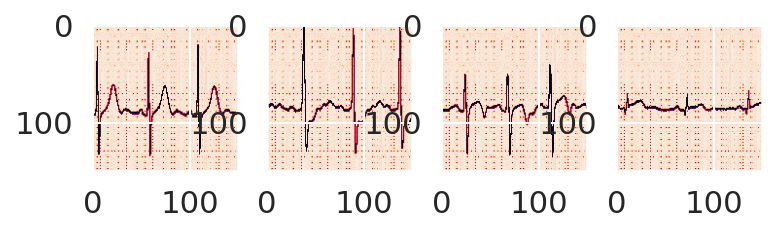

In [33]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
img0 = image.load_img('/content/MyDrive/MyDrive/ECG/data_v2/NormalPersonECGImages/Cropped_Images/Normal_1Cropped_lead4.png', grayscale=True, target_size=(150,150)) #target_size=(28,28), grayscale=True
ax1.imshow(img0)
img1 = image.load_img('/content/MyDrive/MyDrive/ECG/data_v2/ECGImagesofMyocardialInfarctionPatients/Cropped_Images/MI_1Cropped_lead4.png', grayscale=True, target_size=(150,150)) #target_size=(28,28), grayscale=True
ax2.imshow(img1)
img2 = image.load_img('/content/MyDrive/MyDrive/ECG/data_v2/ECGImagesofPatientthathaveabnormalheartbeat/Cropped_Images/HB_1Cropped_lead4.png', grayscale=True, target_size=(150,150)) #target_size=(28,28), grayscale=True
ax3.imshow(img2)
img3 = image.load_img('/content/MyDrive/MyDrive/ECG/data_v2/ECGImagesofPatientthathaveHistoryofMI/Cropped_Images/PMI_129Cropped_lead4.png', grayscale=True, target_size=(150,150)) #target_size=(28,28), grayscale=True
ax4.imshow(img3)